In [1]:
#import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#đọc và hiển thị 5 dòng đầu tiên của dữ liệu 
df = pd.read_csv('/content/drive/MyDrive/OLAP/Dataset OLAP/RF.csv')
df.head()

,order_id,order_date,item_id,qty_ordered,price,value,discount_amount,total,category,cust_id,year,month,ref_num,age,state,zip,region,discount_percent
0,100354678,10/1/2020,574774,11,19.0,190.0,0.0,190.0,Men's Fashion,60124,2020,10,987867,43,OK,73571,South,0.0
1,100354680,10/1/2020,574777,9,149.9,1199.2,0.0,1199.2,Men's Fashion,60124,2020,10,987867,43,OK,73571,South,0.0
2,100354680,10/1/2020,574779,9,79.9,639.2,0.0,639.2,Men's Fashion,60124,2020,10,987867,43,OK,73571,South,0.0
3,100367357,11/13/2020,595185,2,99.9,99.9,0.0,99.9,Men's Fashion,60124,2020,11,987867,43,OK,73571,South,0.0
4,100367357,11/13/2020,595186,2,39.9,39.9,0.0,39.9,Men's Fashion,60124,2020,11,987867,43,OK,73571,South,0.0


Dataset đã được loại bỏ các thuộc tính không cần thiết trong quá trình Datamining để cho dữ liệu được ngắn gọn và dễ làm việc hơn

<ipython-input-3-775a859100f7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


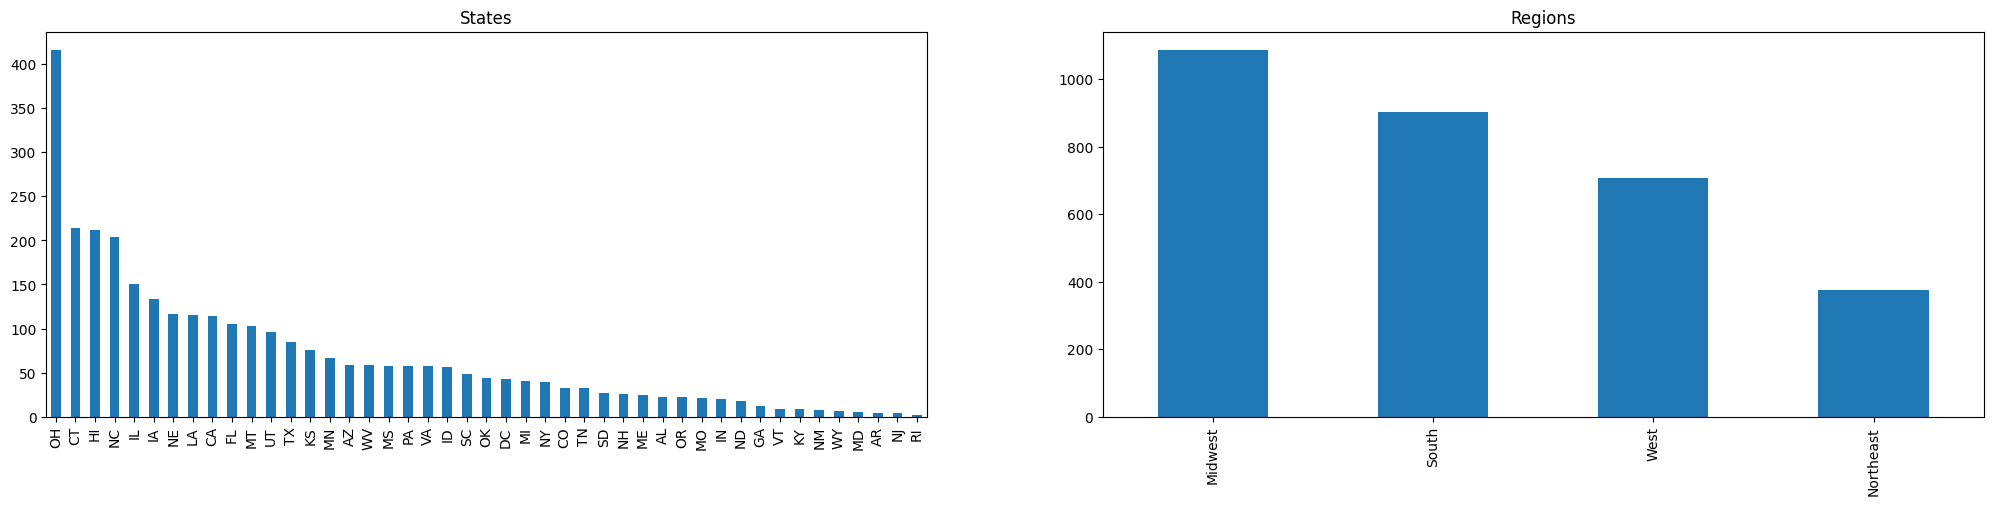

In [3]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,2)
df['region'].value_counts().plot(kind='bar').set_title('Regions')

plt.subplot(1,2,1)
df['state'].value_counts().plot(kind='bar').set_title('States')

plt.show()

Ở 2 đồ thị trên ta sẽ thấy được sự tương quan cũng như mối quan hệ giữa các thuộc tính với nhau như: Doanh thu với các Bang (States) và Doanh thu với các khu vực địa lý (Regions). 

Từ đây ta cũng có thể rút ra được doanh thu của khu vực địa lý hay bang nào sẽ chiếm tỉ trọng cao nhất và giảm dần về các khu vực địa lý hay bang chiếm tỉ trọng doanh thu nhỏ nhất. 

Theo bang thì ta có thể thấy bang OH (Ohio) có doanh thu cao nhất và bang RI (Rhode Island) có doanh thu thấp nhất và đối với các khu vực địa lý thì Midwest chiếm doanh thu cao nhất và Northeast chiếm doanh thu nhỏ nhất.

In [4]:
colors = []

for i in df.groupby('state').value.sum():
  if i > df.groupby('state').value.sum().mean():
    colors.append('lightgreen')
  else:
    colors.append('lightblue')
    
colors2 = []

for i in df.groupby('region').value.sum():
  if i > df.groupby('region').value.sum().mean():
    colors2.append('lightgreen')
  else:
    colors2.append('lightblue')

Đoạn code trên được sử dụng để tạo hai danh sách màu sắc (colors và colors2) dựa trên giá trị tổng của nhóm dữ liệu được nhóm lại theo cột 'state' và 'region' trong dataframe df.

Đoạn code trích xuất thông tin về các tiểu bang (states) và các khu vực (regions) từ dataframe df và tính tổng doanh số bán hàng của mỗi tiểu bang và mỗi khu vực. Sau đó, nó so sánh mỗi giá trị tổng doanh số với giá trị trung bình của tổng doanh số của tất cả các tiểu bang và các khu vực. Nếu giá trị tổng doanh số của một tiểu bang hay một khu vực lớn hơn giá trị trung bình, màu 'lightgreen' được gán cho tiểu bang hay khu vực đó đó; ngược lại, màu 'lightblue' được gán cho tiểu bang hay khu vực đó. Kết quả là danh sách màu (colors) chứa các màu tương ứng với từng tiểu bang và (colors2) chứa các màu tương ứng với từng khu vực.

<ipython-input-5-bd988569e41c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


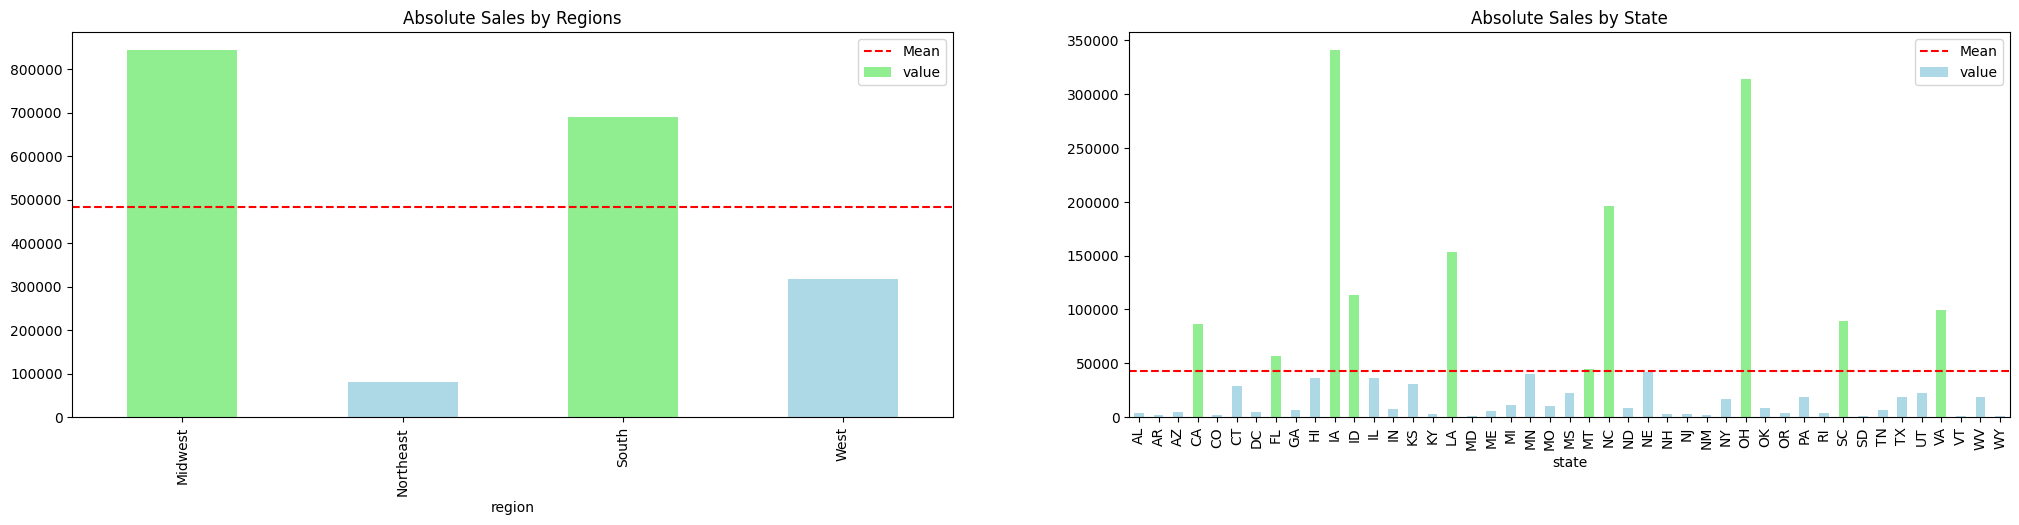

In [5]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,1)
df.groupby('region').value.sum().plot(kind='bar', color=colors2, title='Absolute Sales by Regions')
plt.axhline(df.groupby('region').value.sum().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
df.groupby('state').value.sum().plot(kind='bar', color=colors, title='Absolute Sales by State')
plt.axhline(df.groupby('state').value.sum().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.show()

Cả hai biểu đồ cung cấp cái nhìn tổng quan về doanh số bán hàng theo khu vực và tiểu bang, cho phép so sánh giữa các khu vực và tiểu bang về mức độ đóng góp vào tổng doanh số bán hàng. Đường kẻ ngang màu đỏ biểu thị giá trị trung bình giúp so sánh các giá trị doanh số bán hàng với mức trung bình và có thể cho thấy sự phân bố của các khu vực và tiểu bang theo mức độ doanh số bán hàng.

In [6]:
colors3 = []

for i in df.groupby('state').value.mean():
  if i > df.groupby('state').value.mean().mean():
    colors3.append('lightgreen')
  else:
    colors3.append('lightblue')
    
colors4 = []

for i in df.groupby('region').value.mean():
  if i > df.groupby('region').value.mean().mean():
    colors4.append('lightgreen')
  else:
    colors4.append('lightblue')

Đoạn code trên được sử dụng để tạo hai danh sách màu sắc (colors3 và colors4) dựa trên giá trị trung bình của nhóm dữ liệu được nhóm lại theo cột 'state' và 'region' trong dataframe df.

Đoạn code trích xuất thông tin về các tiểu bang (states) và các khu vực (regions) từ dataframe df và tính giá trị trung bình của tổng doanh số bán hàng của mỗi tiểu bang và mỗi khu vực. Sau đó, nó so sánh từng giá trị trung bình với giá trị trung bình của tổng doanh số của tất cả các tiểu bang và khu vực. 

Điều này được thực hiện bằng cách lặp qua từng giá trị trung bình và kiểm tra xem giá trị đó có lớn hơn giá trị trung bình của tổng doanh số hay không. Nếu giá trị trung bình của một tiểu bang hoặc khu vực lớn hơn giá trị trung bình của tổng doanh số, màu 'lightgreen' được gán cho tiểu bang hoặc khu vực đó. Ngược lại, nếu giá trị trung bình nhỏ hơn hoặc bằng giá trị trung bình của tổng doanh số, màu 'lightblue' được gán. Kết quả là danh sách màu (colors3) chứa các màu tương ứng với từng tiểu bang và (colors4) chứa các màu tương ứng với từng khu vực.

<ipython-input-7-bbf052a41b9f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


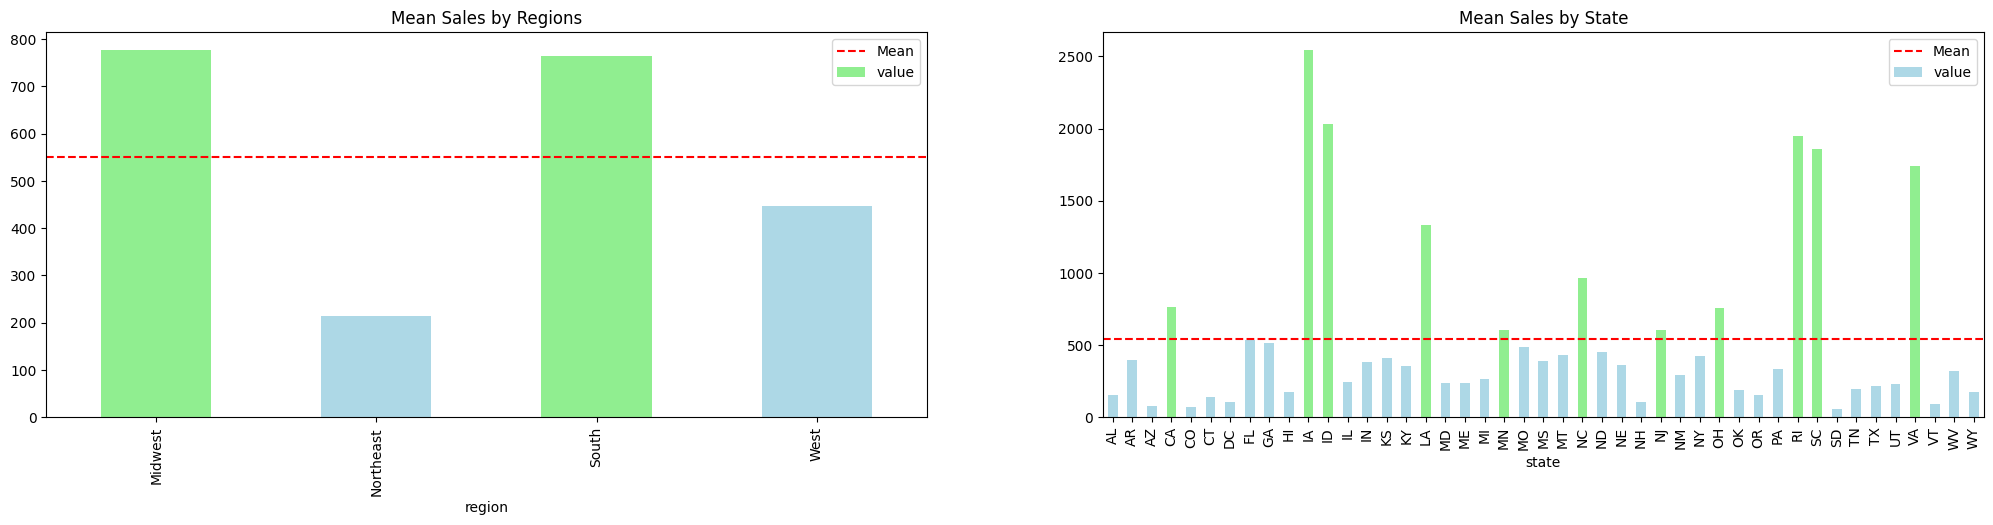

In [7]:
plt.subplots(figsize=(25,5))

plt.subplot(1,2,1)
df.groupby('region').value.mean().plot(kind='bar', color=colors4, title='Mean Sales by Regions')
plt.axhline(df.groupby('region').value.mean().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
df.groupby('state').value.mean().plot(kind='bar', color=colors3, title='Mean Sales by State')
plt.axhline(df.groupby('state').value.mean().mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.show()

2 đồ thị này thể hiện giá trị trung bình của doanh số bán hàng theo khu vực và tiểu bang, và so sánh giá trị trung bình đó với giá trị trung bình của tổng doanh số của tất cả các khu vực và tiểu bang. Các đường ngang đại diện cho giá trị trung bình và màu sắc của các cột thể hiện xem giá trị trung bình của khu vực hoặc tiểu bang có cao hơn hay thấp hơn giá trị trung bình chung.

<ipython-input-8-045ef50accc5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


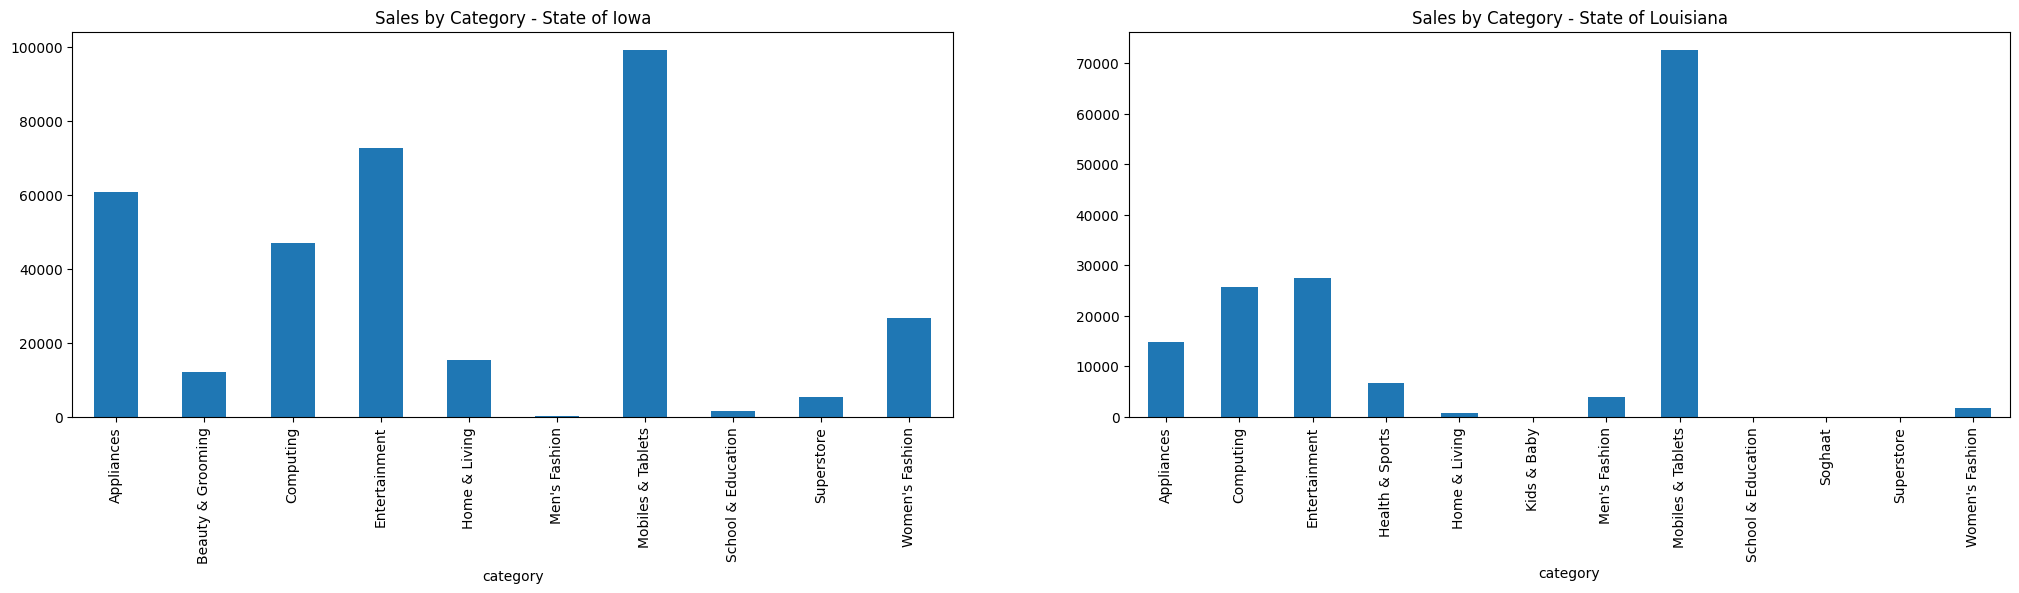

In [8]:
fig, axs = plt.subplots(4,figsize=(25,5))

plt.subplot(1,2,1)
df[df['state'] == 'IA'].groupby('category').value.sum().plot(kind='bar').set_title('Sales by Category - State of Iowa')
plt.subplot(1,2,2)
df[df['state'] == 'LA'].groupby('category').value.sum().plot(kind='bar').set_title('Sales by Category - State of Louisiana')

fig.show()

Cả 2 đồ thị này hiển thị tổng doanh số bán hàng theo danh mục (category) trong hai tiểu bang Iowa và Louisiana. Các biểu đồ bar chart cho phép so sánh doanh số bán hàng giữa các danh mục khác nhau trong từng tiểu bang.

Ví dụ:

Ở tiểu bang Iowa thì ta có thể thấy được doanh thu cao nhất thuộc về các sản phẩm thuộc danh mục Mobiles and Tablets và sản phẩm thuộc danh mục Men's Fashion có doanh thu thấp nhất. Và có một số doanh mục hầu như không tạo ra doanh thu ở tiểu bang này như Kids & Baby, Soghaat, v.v

<ipython-input-9-3a00e9d5684c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


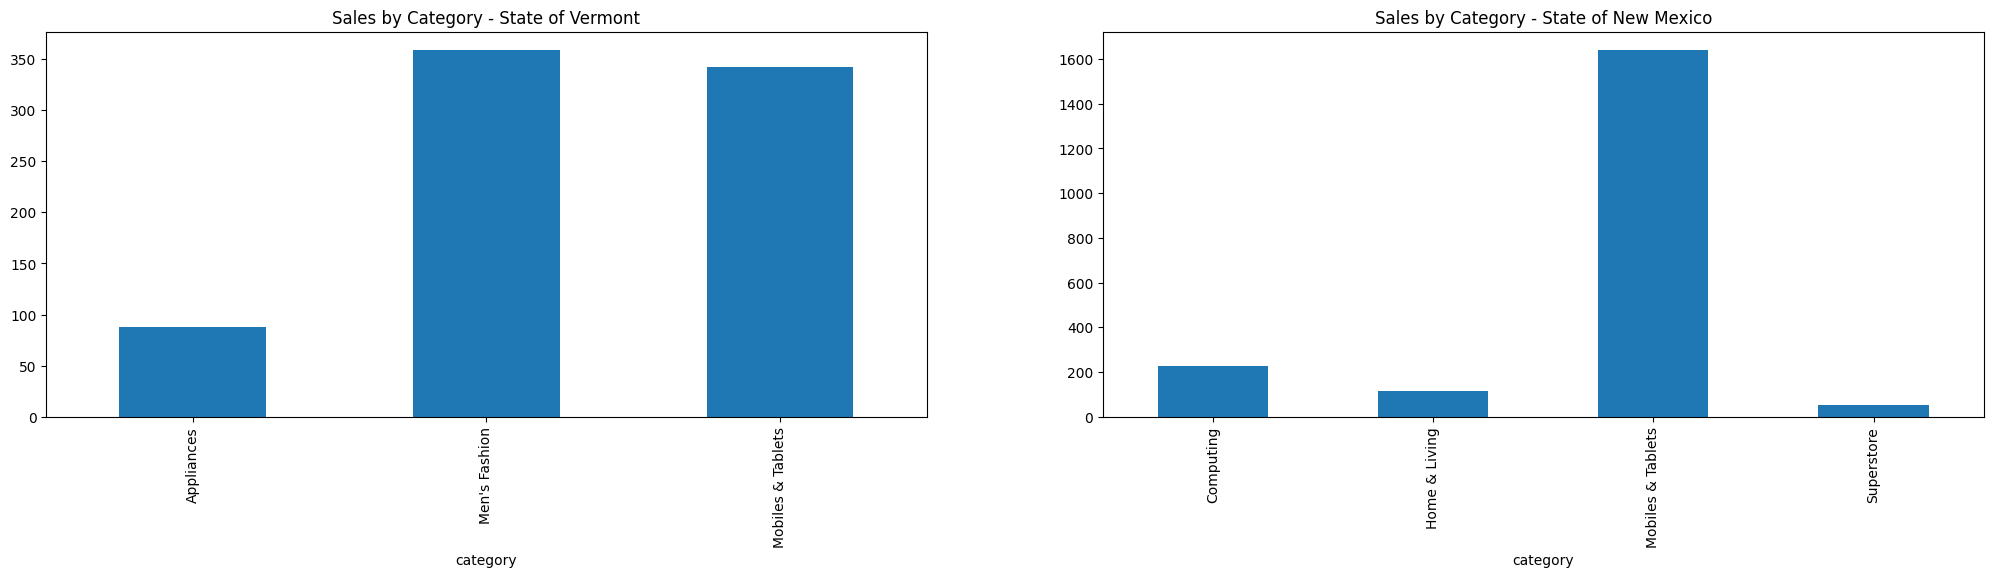

In [9]:
fig, axs = plt.subplots(4,figsize=(25,5))

plt.subplot(1,2,1)
df[df['state'] == 'VT'].groupby('category').value.sum().plot(kind='bar').set_title('Sales by Category - State of Vermont')
plt.subplot(1,2,2)
df[df['state'] == 'NM'].groupby('category').value.sum().plot(kind='bar').set_title('Sales by Category - State of New Mexico')

fig.show()

Tương tự ở 2 tiểu bang này thì ta có thể thấy chỉ có 1 số ít danh mục sản phẩm là có doanh thu ở 2 tiểu bang này. Đối với Vermont là 3 danh mục: cao nhất là Men's Fashion và thấp nhất là Appliances. Đối với New Mexico là 4 danh mục: cao nhất là Mobiles and Tablets và thấp nhất là Superstore. Và hầu như các danh mục khác không tạo ra doanh thu ở 2 tiểu bang này.

In [10]:
colors5 = []

for i in df.groupby(['region','state']).value.mean():
  if i > df.groupby(['region','state']).value.mean().mean():
    colors5.append('lightgreen')
  else:
    colors5.append('lightblue')

Đoạn code trên trích xuất thông tin về các khu vực (region) và tiểu bang (state) từ dataframe df. Sau đó, nó tính giá trị trung bình của doanh số bán hàng (value) cho từng cặp khu vực và tiểu bang.

Tiếp theo, đoạn code so sánh mỗi giá trị trung bình của doanh số bán hàng với giá trị trung bình của toàn bộ doanh số bán hàng của tất cả các khu vực và tiểu bang. Nếu giá trị trung bình của doanh số bán hàng của một cặp khu vực và tiểu bang lớn hơn giá trị trung bình chung, màu 'lightgreen' được gán cho cặp khu vực và tiểu bang đó; ngược lại, màu 'lightblue' được gán.

Kết quả là danh sách màu (colors5) chứa các màu tương ứng với từng cặp khu vực và tiểu bang trong dataframe. Màu 'lightgreen' thể hiện rằng doanh số bán hàng của cặp khu vực và tiểu bang đó cao hơn giá trị trung bình chung, trong khi màu 'lightblue' thể hiện rằng doanh số bán hàng của cặp khu vực và tiểu bang đó thấp hơn giá trị trung bình chung.

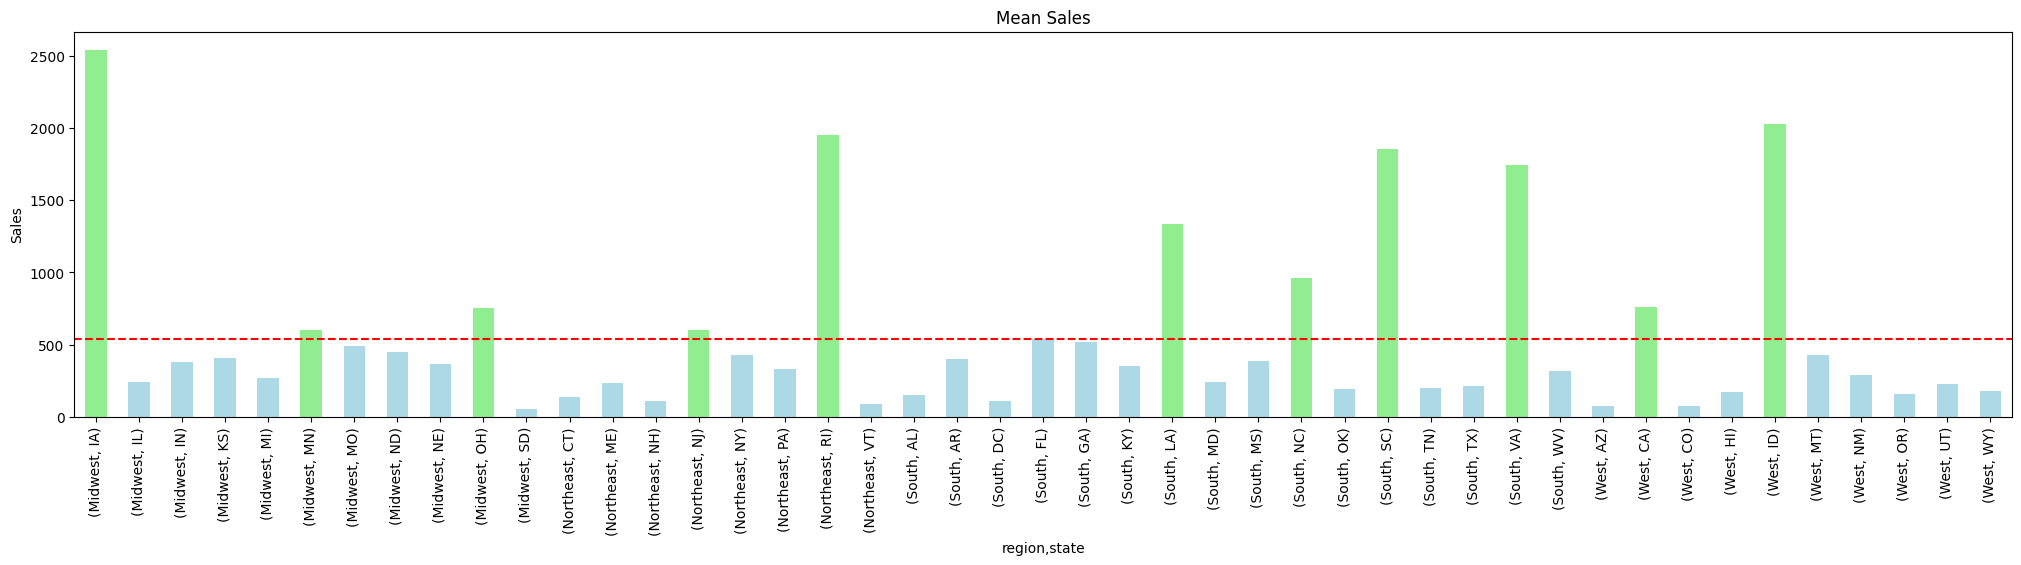

In [11]:
plt.subplots(figsize=(25,5))
df.groupby(['region','state']).value.mean().plot(kind='bar', color=colors5, ylabel='Sales').set_title("Mean Sales")
plt.axhline(df.groupby(['region','state']).value.mean().mean(), ls='--', color='red')
plt.show()

Biểu đồ giúp thể hiện sự khác biệt giữa doanh số bán hàng theo cặp thuộc tính khu vực và tiểu bang, và cho phép chúng ta nhận ra những tiểu bang nào ở khu vực nào có giá trị trung bình doanh số bán hàng cao hơn hoặc thấp hơn so với giá trị trung bình chung.

Nhìn vào đồ thị ta có thể thấy được các bang như IA, MN, OH, NJ, RI, LA, NC, SC, VA, CA, ID là có giá trị trung bình doanh số bán hàng cao hơn so với giá trị trung bình chung.

***Và bây giờ để tạo mô hình machine learning, ta sẽ phân tích sự tương quan giữa các biến với nhau.***

<ipython-input-12-34eb2c558acf>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


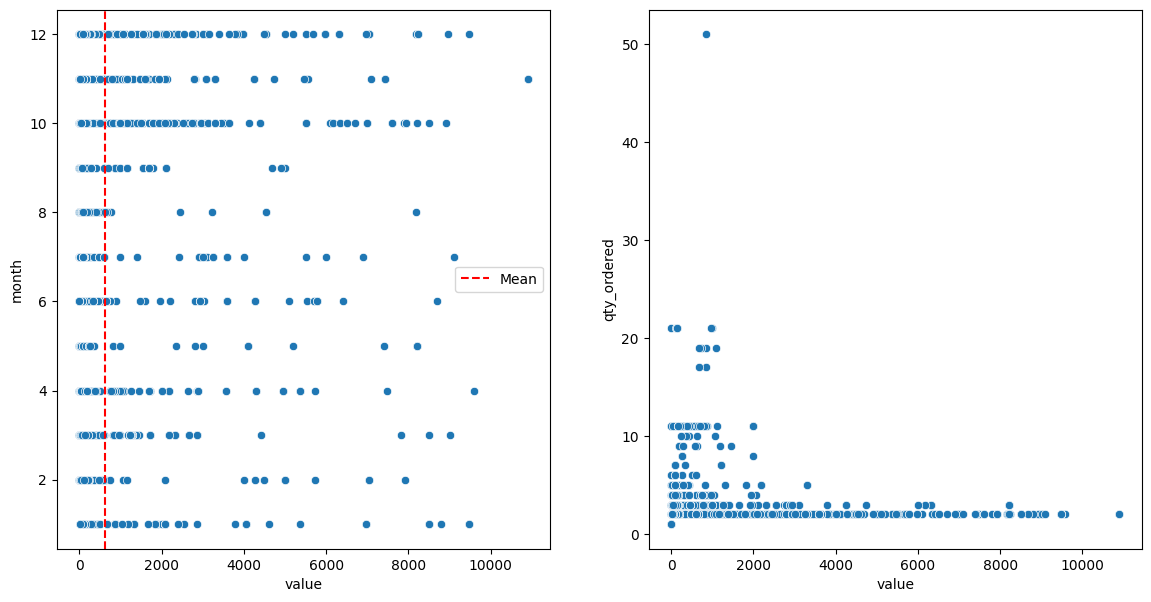

In [12]:
plt.subplots(figsize=(14,7))

plt.subplot(1,2,1)
sns.scatterplot(x=df.value, y=df.month)
plt.axvline(df.value.mean(), ls='--', color='red', label='Mean')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=df.value, y=df['qty_ordered'])

plt.show()

Biểu đồ thứ nhất (phía trái) là một scatter plot (biểu đồ phân tán) thể hiện mối quan hệ giữa Doanh thu và các Tháng trong năm. Trục x biểu thị giá trị Doanh thu, trong khi trục y biểu thị các tháng. Mỗi điểm trên biểu đồ đại diện cho một giá trị 'value' tương ứng với tháng tương ứng. Đường thẳng màu đỏ là đường trung bình của biến 'value' và đại diện cho giá trị trung bình của 'value' trên toàn bộ dữ liệu. Biểu đồ này giúp xem xét mối quan hệ giữa 'value' và 'month' và nhận biết sự phân bố của giá trị 'value' trong từng tháng.

***Ở đồ thị trái ta có thể thấy tổng doanh thu sẽ chiếm tỉ trọng cao (chỉ là chiếm nhiều hơn so với các tháng khác chứ không quá biến động) ở 2 tháng 10 và 12. Còn ở các tháng khác thì doanh số trải đều không bị trường hợp có tháng doanh thu quá nhỏ hay doanh thu bị thưa giữa các tháng.***

Biểu đồ thứ hai (phía phải) cũng là một scatter plot thể hiện mối quan hệ giữa Doanh thu và số lượng của sản phẩm trong đơn hàng. Trục x biểu thị giá trị 'value', trong khi trục y biểu thị số lượng hàng đã đặt. Mỗi điểm trên biểu đồ đại diện cho một giá trị 'value' và số lượng hàng đã đặt tương ứng. Biểu đồ này giúp xem xét mối quan hệ giữa 'value' và 'qty_ordered' và nhận biết sự phân bố của giá trị 'value' đối với số lượng hàng đã đặt.

***Ở đồ thị phải ta có thể thấy tổng doanh thu sẽ tập trung ở những đơn hàng có số lượng đặt hàng của 1 sản phẩm từ 11 trở xuống và có giá trị của biến 'value' là tầm 2500 trở xuống. Và đa số các đơn hàng có số lượng đặt hàng của 1 sản phẩm là trên 12 hay 13 đều chiếm doanh thu rất ít.***

# **DỰ ĐOÁN DOANH THU THEO CATEGORY**

**Để tạo mô hình machine learning để dự đoán Doanh số, ta sẽ sử dụng RandomForestRegressor.**






In [13]:
#IMPORT THƯ VIỆN CẦN THIẾT
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
#đếm số lượng đơn hàng theo category
df['category'].value_counts()

Men's Fashion         525
Women's Fashion       470
Mobiles & Tablets     469
Appliances            303
Soghaat               225
Others                181
Superstore            180
Beauty & Grooming     160
Entertainment         145
Home & Living         144
Health & Sports       100
Kids & Baby            76
Computing              73
School & Education     12
Books                   7
Name: category, dtype: int64

<ipython-input-15-101151ef11a2>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


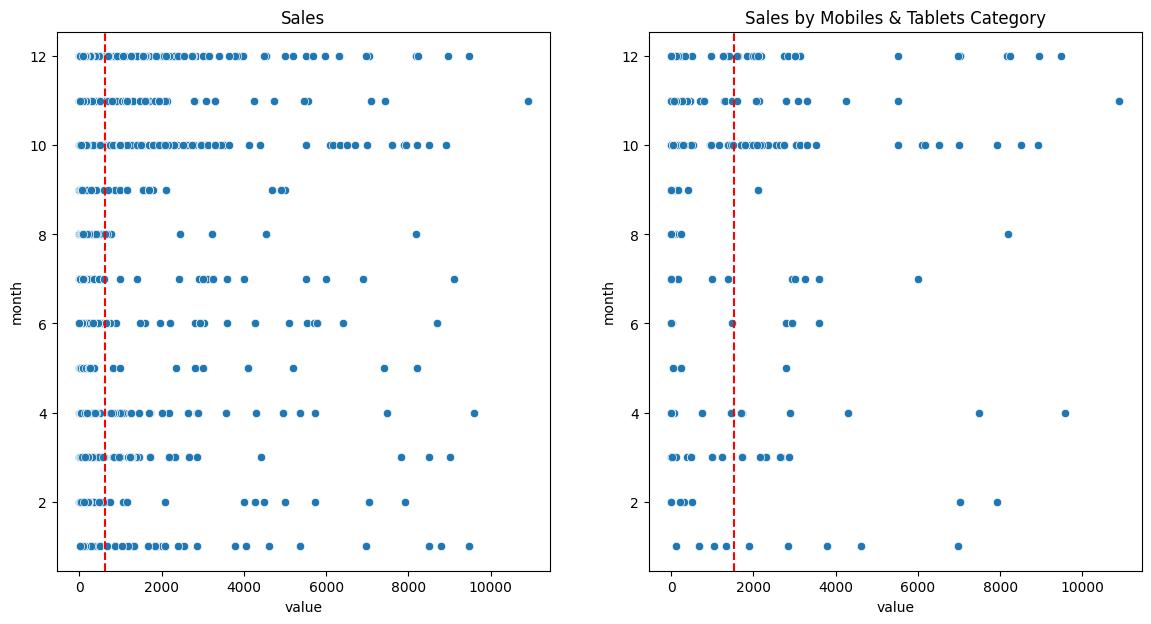

In [15]:
plt.subplots(figsize=(14,7))

plt.subplot(1,2,1)
sns.scatterplot(x=df['value'], y=df['month']).set_title('Sales')
plt.axvline(df['value'].mean(), ls='--', color='red')

plt.subplot(1,2,2)
sns.scatterplot(x=df[df['category'] == 'Mobiles & Tablets'].value, y=df[df['category'] == 'Mobiles & Tablets'].month).set_title('Sales by Mobiles & Tablets Category')
plt.axvline(df[df['category'] == 'Mobiles & Tablets'].value.mean(), ls='--', color='red')

fig.show()

Cả hai biểu đồ đều giúp thể hiện phân phối và mối quan hệ giữa doanh số và tháng trong toàn bộ tập dữ liệu (subplot 1) và trong danh mục 'Mobiles & Tablets' (subplot 2). Điều này giúp phân tích và so sánh doanh số theo thời gian và trong một danh mục cụ thể.

Thì ở Biểu đồ phía bên phải ta có thể thấy Doanh thu của danh mục Mobiles & Tablets sẽ đạt ở mức cao nhất từ tháng 10 cho đến tháng 12 (của năm 2020).

In [16]:
dummie = pd.get_dummies(df['category'])
df.drop("category", axis=1, inplace=True)
df = pd.concat((df, dummie), axis=1)

In [17]:
df.head()

,order_id,order_date,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,...,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion
0,100354678,10/1/2020,574774,11,19.0,190.0,0.0,190.0,60124,2020,...,0,0,0,1,0,0,0,0,0,0
1,100354680,10/1/2020,574777,9,149.9,1199.2,0.0,1199.2,60124,2020,...,0,0,0,1,0,0,0,0,0,0
2,100354680,10/1/2020,574779,9,79.9,639.2,0.0,639.2,60124,2020,...,0,0,0,1,0,0,0,0,0,0
3,100367357,11/13/2020,595185,2,99.9,99.9,0.0,99.9,60124,2020,...,0,0,0,1,0,0,0,0,0,0
4,100367357,11/13/2020,595186,2,39.9,39.9,0.0,39.9,60124,2020,...,0,0,0,1,0,0,0,0,0,0


In [18]:
x = df.drop(['order_date', 'state', 'region', 'value'], axis=1)

y = df['value']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

predicao = forest.predict(x_test)

print("MSE:", mean_squared_error(y_test, predicao))
print("MAE:", mean_absolute_error(y_test, predicao))
print("R²:", r2_score(y_test, predicao))

MSE: 3736.934709664636
MAE: 11.713490130293216
R²: 0.998100709737756


Đoạn code trên thực hiện các bước sau:

Train/test split: Dữ liệu được chia thành hai tập là tập huấn luyện (x_train, y_train) và tập kiểm tra (x_test, y_test) bằng hàm train_test_split(). Tập kiểm tra chiếm 20% tổng số dữ liệu ban đầu. Đây là bước quan trọng để đánh giá hiệu suất của mô hình trên dữ liệu mới.

Khởi tạo mô hình: Mô hình RandomForestRegressor được khởi tạo bằng cách tạo một đối tượng forest thông qua RandomForestRegressor().

Huấn luyện mô hình: Mô hình RandomForestRegressor được huấn luyện trên dữ liệu huấn luyện (x_train, y_train) bằng cách gọi phương thức fit(). Mô hình học từ dữ liệu huấn luyện để tìm mối quan hệ giữa các đặc trưng (x_train) và biến mục tiêu (y_train).

Dự đoán: Mô hình được sử dụng để dự đoán giá trị của biến mục tiêu trên tập dữ liệu kiểm tra (x_test) bằng cách gọi phương thức predict(). Kết quả dự đoán được lưu vào biến predicao.

Đánh giá mô hình: Đoạn code tính toán và in ra các độ đo đánh giá hiệu suất của mô hình trên tập kiểm tra.

In [21]:
print('True value:', y_test.mean())
print('Prediction:', predicao.mean())

True value: 635.0181530944625
Prediction: 631.9039265472312
